Import needed tools

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

load dataset

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Phase 1: Exploratory Data Analysis (EDA)
The first phase of project, Exploratory Data Analysis, reveals key insights into the dataset, which are crucial for building an effective predictive model.

In [6]:
print(df.shape)
print(df.info())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
#statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [24]:
df.duplicated().sum()

np.int64(0)

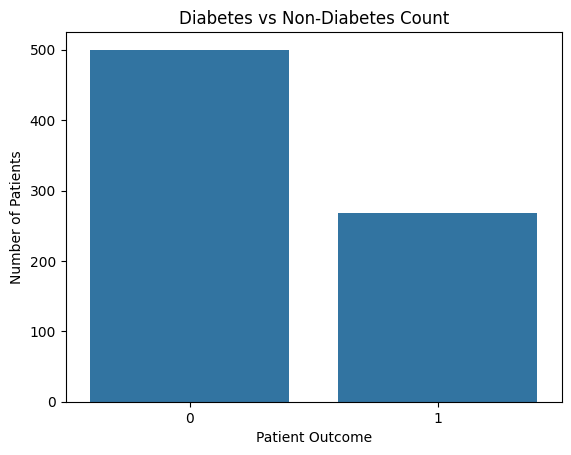

In [11]:
#How many patients have diabetes versus those who don’t

sns.countplot(data= df, x='Outcome')
plt.title('Diabetes vs Non-Diabetes Count')
plt.xlabel('Patient Outcome')
plt.ylabel('Number of Patients')
plt.show()

The dataset has an imbalanced class distribution, with more non-diabetic than diabetic patients.

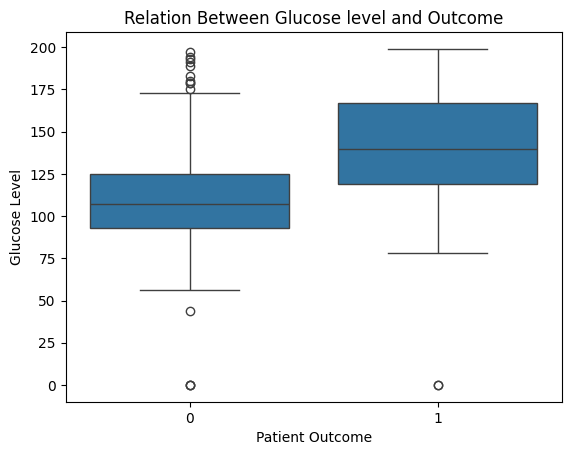

In [13]:
#What’s the relationship between glucose levels and the outcome

sns.boxplot(data= df, x= 'Outcome', y= 'Glucose')
plt.title('Relation Between Glucose level and Outcome')
plt.xlabel('Patient Outcome')
plt.ylabel('Glucose Level')
plt.show()

Glucose levels are a key feature for predicting diabetes, with diabetic patients showing significantly higher levels.

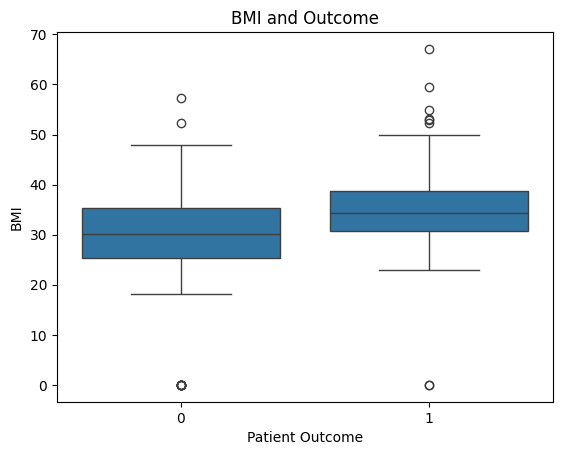

In [14]:
#Does BMI play a significant role

sns.boxplot(data= df, x= 'Outcome', y= 'BMI')
plt.title('BMI and Outcome')
plt.xlabel('Patient Outcome')
plt.ylabel('BMI')
plt.show()

BMI is also a strong indicator, as diabetic patients tend to have a higher BMI compared to their non-diabetic counterparts.

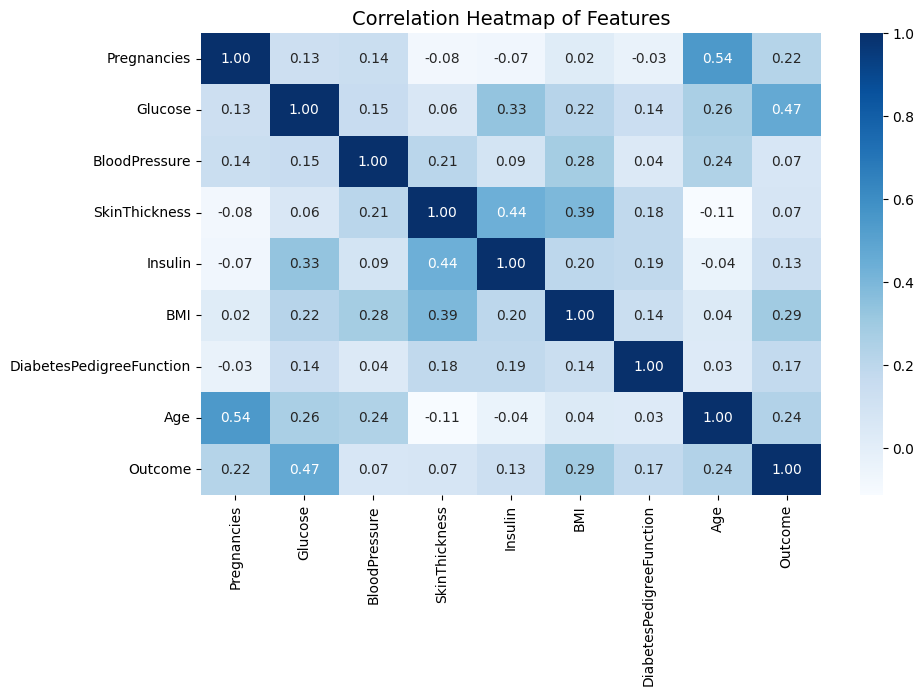

In [17]:
#Heatmap of Correlation Matrix

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

Phase 2: Preprocessing Data

In [42]:
# Features and target
X = df.drop('Outcome', axis= 1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

Phase 3: Build, Train and Compete

Logistic Regression Accuracy: 70.77922077922078
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



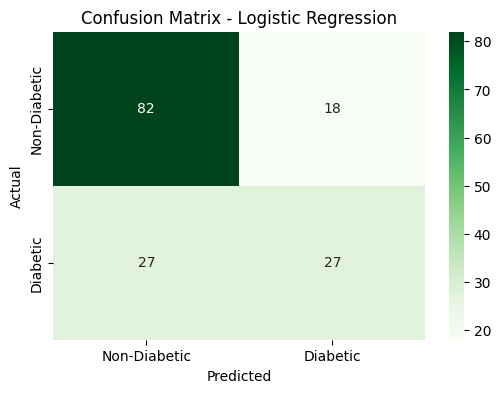

In [50]:
#Logistic Regression

log_reg = LogisticRegression(max_iter= 1000)
log_reg.fit(X_train_scaler, y_train)
predict_log_reg = log_reg.predict(X_test_scaler)

print("Logistic Regression Accuracy:", accuracy_score(y_test, predict_log_reg)*100)
print(classification_report(y_test, predict_log_reg))

# Confusion Matrix
cm = confusion_matrix(y_test, predict_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Random Forest Accuracy: 75.97402597402598
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



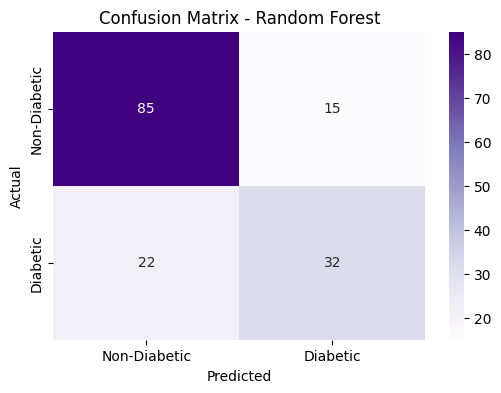

In [52]:
#Random Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
predict_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, predict_rf)*100)
print(classification_report(y_test, predict_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, predict_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.775303212048514

Test Accuracy: 0.7402597402597403

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.68      0.48      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



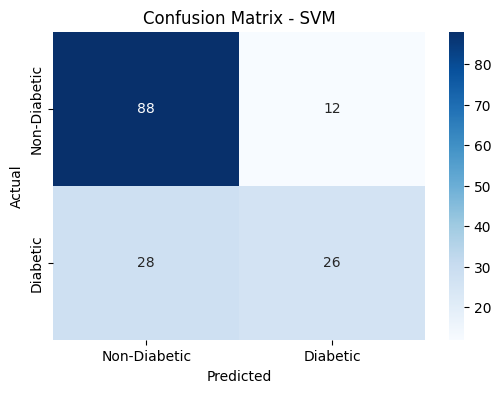

In [41]:
#Support Vector Machine with GridSearchCV

param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["rbf"],
    "gamma": [0.01, 0.1, 1]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_scaler, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

svm_best = grid.best_estimator_
y_pred = svm_best.predict(X_test_scaler)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

Phase 4: Launch Your Prediction Engine

In [57]:
def predict_diabetes(new_data, model, scaler=None):

    data = pd.DataFrame([new_data], columns=X.columns)  #list or array of feature values in correct order
    if scaler:
        data = scaler.transform(data)
    prediction = model.predict(data)[0]
    return "Diabetic" if prediction == 1 else "Non-Diabetic"

# prediction using logistic regression
sample = X.iloc[0].values  # take first patient as example
print("Prediction:", predict_diabetes(sample, log_reg, scaler))

example_patient = [1,85,66,29,0,26.6,0.351,31]
print("Prediction:", predict_diabetes(example_patient, svm_best, scaler))


Prediction: Diabetic
Prediction: Non-Diabetic
